In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [2]:
#set seed for reproducibility
SEED = 14
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Loading and Initial Inspection

In [3]:
df = pd.read_csv("Medical and Churn Data.csv", header=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

,Unnamed: 0,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,97.29,1.84,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,93.22,0.95,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,96.60,1.87,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,91.45,1.45,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,86.50,1.26,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


# Handling Missing Values

In [4]:
#already confirmed through non-null counts from info()
df.isnull().sum()

Unnamed: 0              0
Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Fireplace               0
HouseColor              0
Garage                  0
Floors                  0
Windows                 0
PreviousSalePrice       0
IsLuxury                0
dtype: int64

# Exploratory Data Analysis

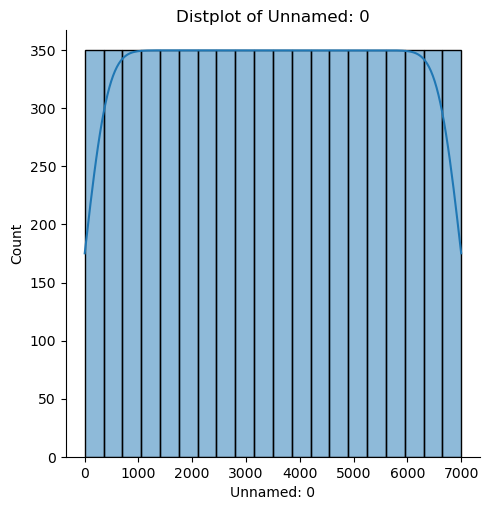

count    7000.000000
mean     3500.500000
std      2020.870275
min         1.000000
25%      1750.750000
50%      3500.500000
75%      5250.250000
max      7000.000000
Name: Unnamed: 0, dtype: float64

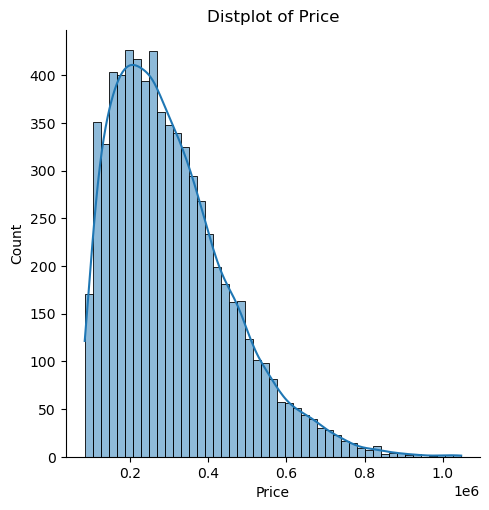

count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64

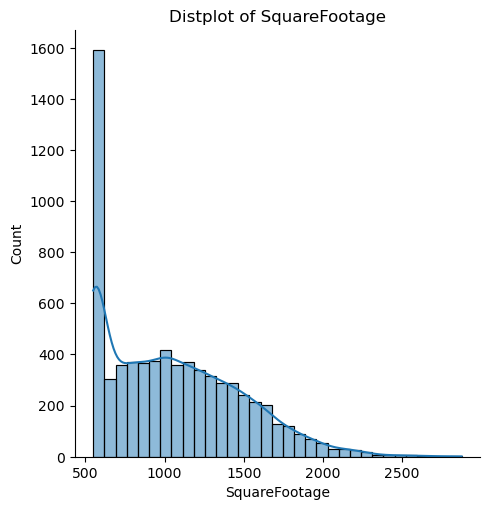

count    7000.000000
mean     1048.947459
std       426.010482
min       550.000000
25%       660.815000
50%       996.320000
75%      1342.292500
max      2874.700000
Name: SquareFootage, dtype: float64

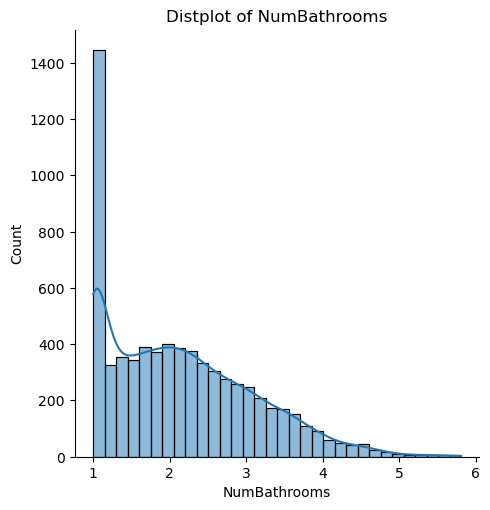

count    7000.000000
mean        2.131397
std         0.952561
min         1.000000
25%         1.290539
50%         1.997774
75%         2.763997
max         5.807239
Name: NumBathrooms, dtype: float64

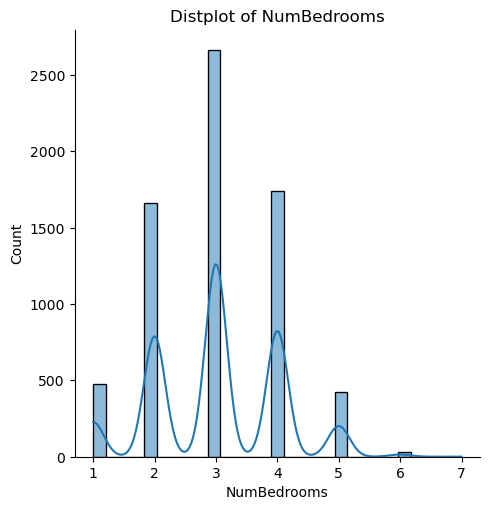

count    7000.000000
mean        3.008571
std         1.021940
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: NumBedrooms, dtype: float64

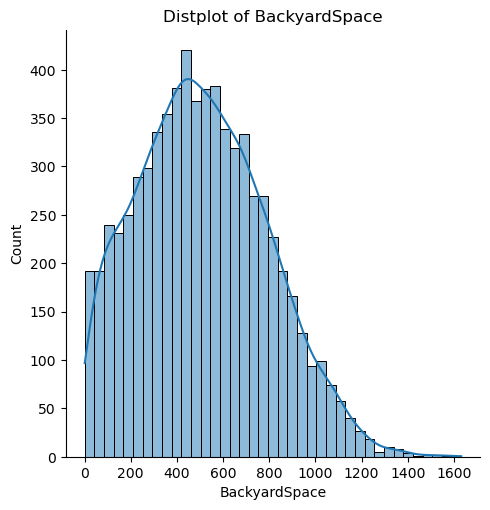

count    7000.000000
mean      511.507029
std       279.926549
min         0.390000
25%       300.995000
50%       495.965000
75%       704.012500
max      1631.360000
Name: BackyardSpace, dtype: float64

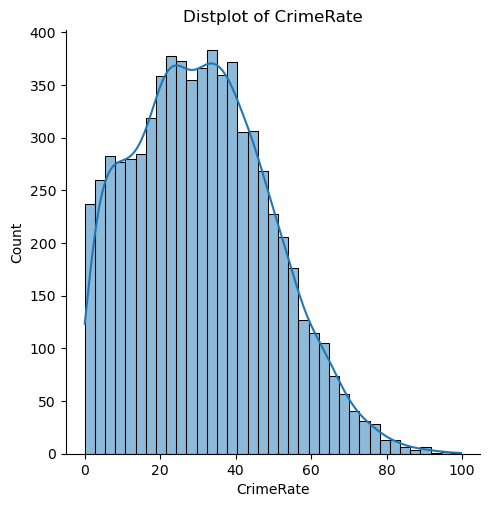

count    7000.000000
mean       31.226194
std        18.025327
min         0.030000
25%        17.390000
50%        30.385000
75%        43.670000
max        99.730000
Name: CrimeRate, dtype: float64

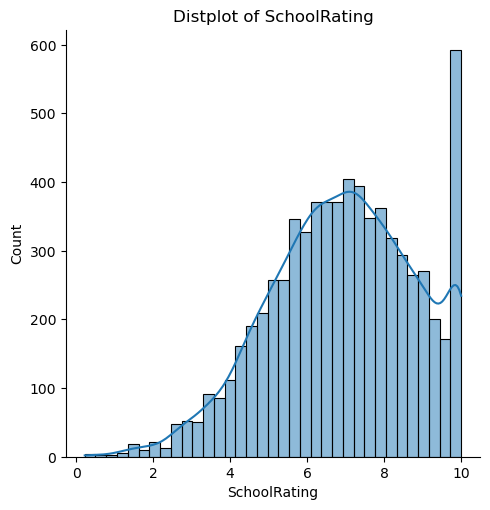

count    7000.000000
mean        6.942923
std         1.888148
min         0.220000
25%         5.650000
50%         7.010000
75%         8.360000
max        10.000000
Name: SchoolRating, dtype: float64

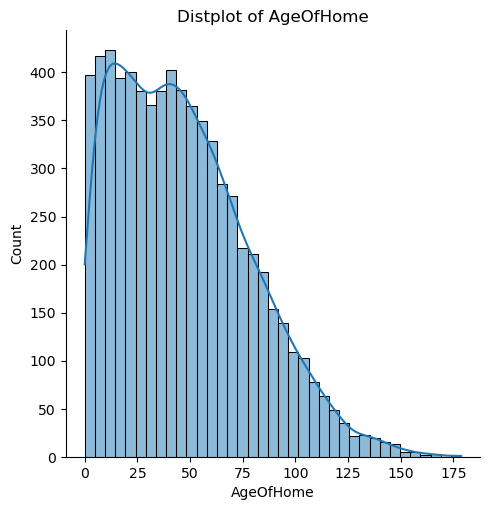

count    7000.000000
mean       46.797046
std        31.779701
min         0.010000
25%        20.755000
50%        42.620000
75%        67.232500
max       178.680000
Name: AgeOfHome, dtype: float64

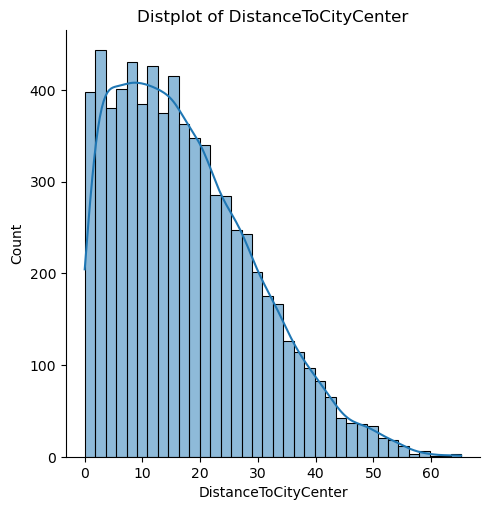

count    7000.000000
mean       17.475337
std        12.024985
min         0.000000
25%         7.827500
50%        15.625000
75%        25.222500
max        65.200000
Name: DistanceToCityCenter, dtype: float64

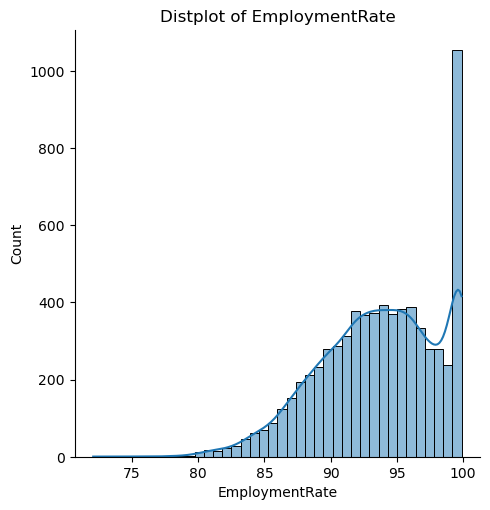

count    7000.000000
mean       93.711349
std         4.505359
min        72.050000
25%        90.620000
50%        94.010000
75%        97.410000
max        99.900000
Name: EmploymentRate, dtype: float64

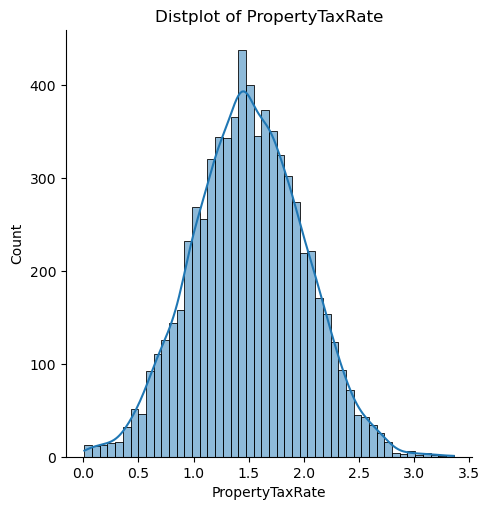

count    7000.000000
mean        1.500437
std         0.498591
min         0.010000
25%         1.160000
50%         1.490000
75%         1.840000
max         3.360000
Name: PropertyTaxRate, dtype: float64

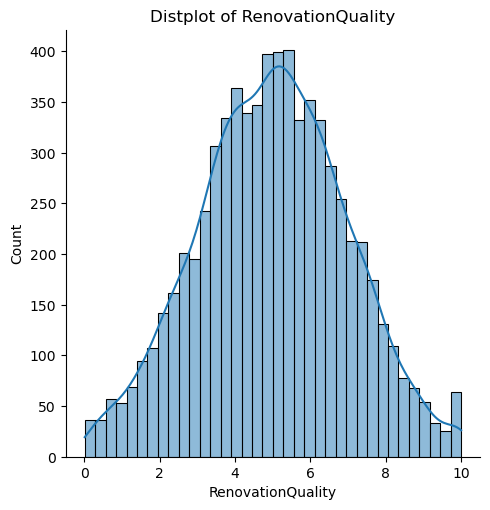

count    7000.000000
mean        5.003357
std         1.970428
min         0.010000
25%         3.660000
50%         5.020000
75%         6.350000
max        10.000000
Name: RenovationQuality, dtype: float64

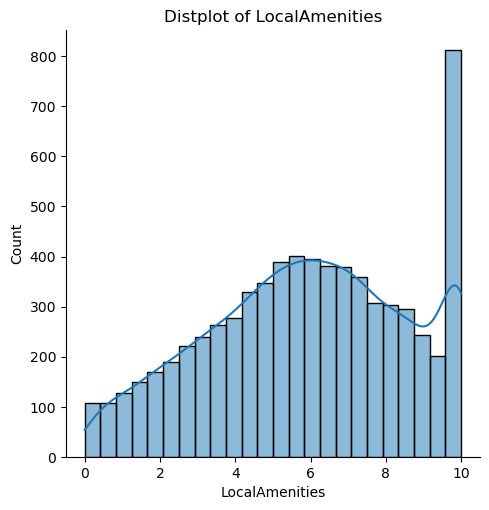

count    7000.000000
mean        5.934579
std         2.657930
min         0.000000
25%         4.000000
50%         6.040000
75%         8.050000
max        10.000000
Name: LocalAmenities, dtype: float64

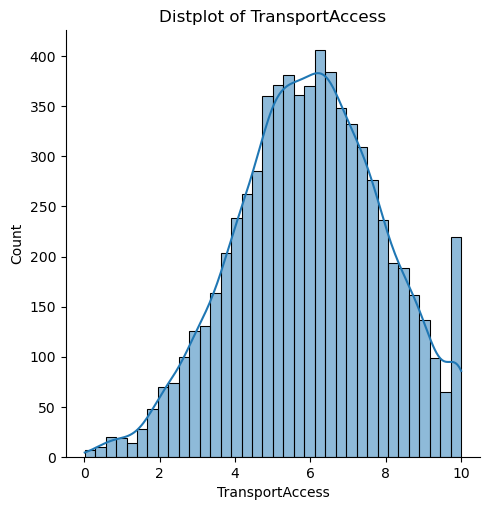

count    7000.000000
mean        5.983860
std         1.953974
min         0.010000
25%         4.680000
50%         6.000000
75%         7.350000
max        10.000000
Name: TransportAccess, dtype: float64

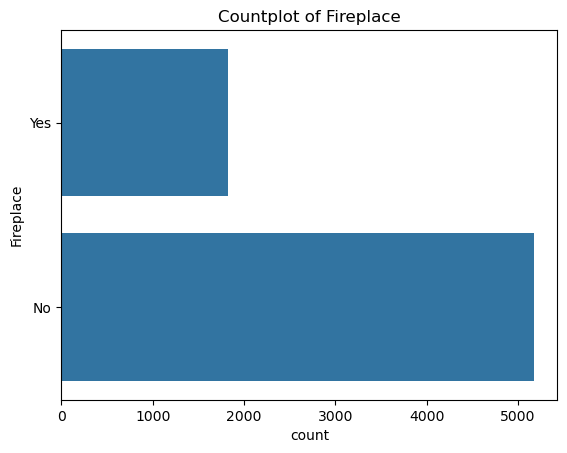

count          7000
unique    [Yes, No]
top              No
freq           5172
Name: Fireplace, dtype: object

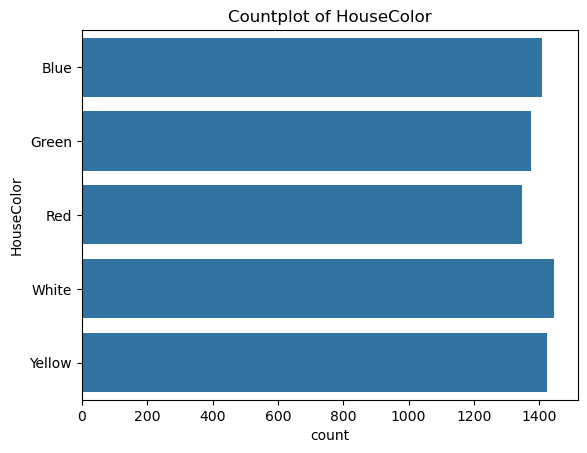

count                                  7000
unique    [Blue, Green, Red, White, Yellow]
top                                   White
freq                                   1446
Name: HouseColor, dtype: object

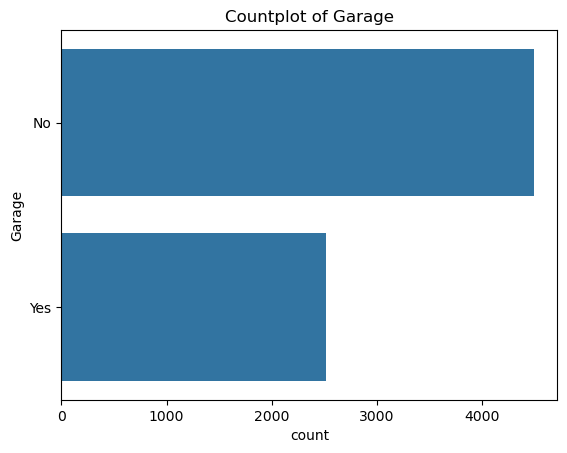

count          7000
unique    [No, Yes]
top              No
freq           4488
Name: Garage, dtype: object

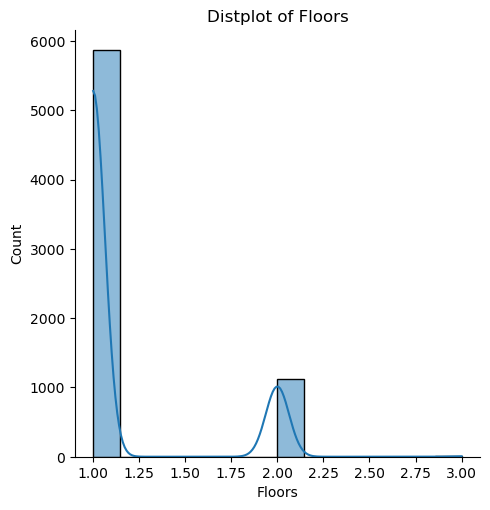

count    7000.00000
mean        1.16300
std         0.37209
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         3.00000
Name: Floors, dtype: float64

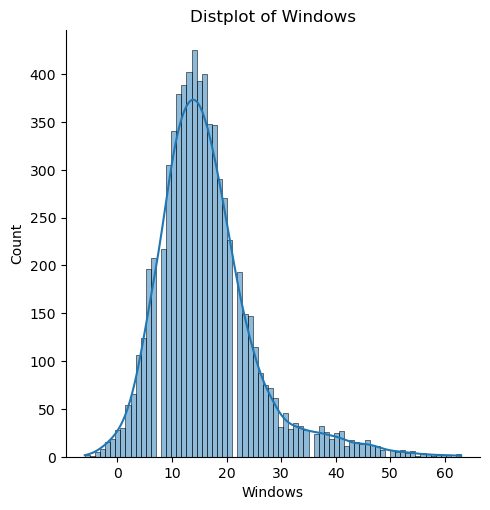

count    7000.000000
mean       16.248857
std         8.926479
min        -6.000000
25%        11.000000
50%        15.000000
75%        20.000000
max        63.000000
Name: Windows, dtype: float64

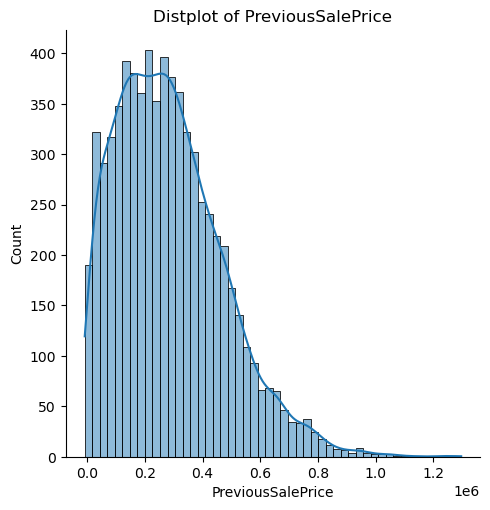

count    7.000000e+03
mean     2.845094e+05
std      1.857340e+05
min     -8.356902e+03
25%      1.420140e+05
50%      2.621831e+05
75%      3.961212e+05
max      1.296607e+06
Name: PreviousSalePrice, dtype: float64

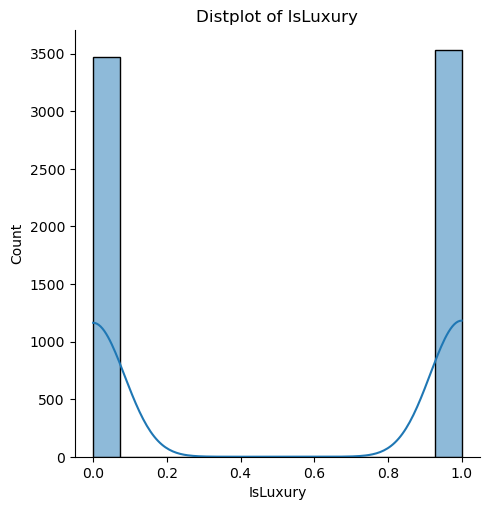

count    7000.00000
mean        0.50400
std         0.50002
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: IsLuxury, dtype: float64

In [5]:
for col in df:
	#capture descriptive statistics series
	x = df[col].describe()
	if df[col].dtype == 'object':
		#add a unique column
		x['unique'] = df[col].unique()
		#visualize distribution
		sns.countplot(df[col])
		plt.title(f'Countplot of {col}')
	else:
		#visualize distribution
		sns.displot(df[col], kde=True)
		plt.title(f'Distplot of {col}')
	plt.show()
	display(x)

# Encode Categorical Variables

In [6]:
#map Yes/No to binary
df[['Garage','Fireplace']] = df[['Garage','Fireplace']].replace({'Yes':1, 'No':0})
#create color dummies
color_dummies = pd.get_dummies(df['HouseColor'], prefix='HouseColor', dtype='int')
#drop original HouseColor and concat color_dummies
df = pd.concat([df.drop(columns=['HouseColor']), color_dummies], axis=1)
#verify change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

# EDA cont.

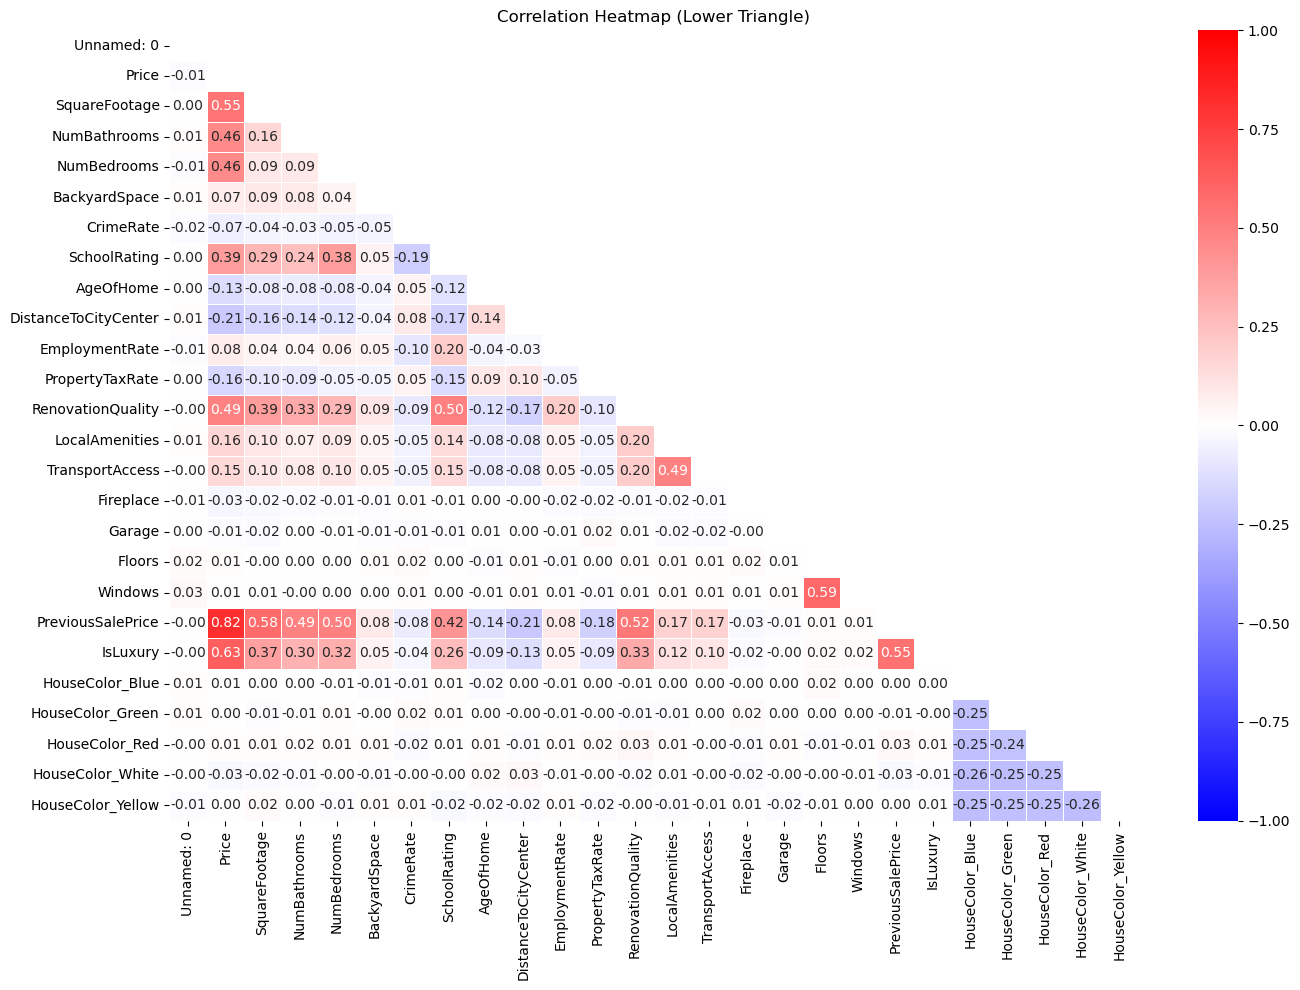

In [7]:
#correlation matrix
matrix = df.corr()
#mask the upper triangle including diagonal
mask = np.triu(np.ones_like(matrix, dtype=bool), k=0)
#create heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
	matrix,
	mask=mask,
	annot=True,
	fmt='.2f',
	linewidths=.5,
	vmax=1, center=0, vmin=-1,
	cmap='bwr'
)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.tight_layout()
plt.show()

# Feature Selection

In [8]:
#remove irrelevant column
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 7000 non-null   float64
 1   SquareFootage         7000 non-null   float64
 2   NumBathrooms          7000 non-null   float64
 3   NumBedrooms           7000 non-null   int64  
 4   BackyardSpace         7000 non-null   float64
 5   CrimeRate             7000 non-null   float64
 6   SchoolRating          7000 non-null   float64
 7   AgeOfHome             7000 non-null   float64
 8   DistanceToCityCenter  7000 non-null   float64
 9   EmploymentRate        7000 non-null   float64
 10  PropertyTaxRate       7000 non-null   float64
 11  RenovationQuality     7000 non-null   float64
 12  LocalAmenities        7000 non-null   float64
 13  TransportAccess       7000 non-null   float64
 14  Fireplace             7000 non-null   int64  
 15  Garage               

# Data Splitting

In [9]:
#separate target and predictors
y = df['Price']
X = df.drop(columns='Price')
#80 train/20 test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=.2)

# Model Implementation

In [10]:
#leaving most values at default to align with "simple approach" project guidance
model = RandomForestRegressor(
	random_state=SEED,
	n_jobs = -1
)
display(model.get_params())
model.fit(X_train, y_train)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}

RandomForestRegressor(n_jobs=-1, random_state=14)

# Model Evaluation

In [11]:
y_pred = model.predict(X_test)
print(f'RMSE: {root_mean_squared_error(y_test, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'R2: {r2_score(y_test, y_pred):.3f}')

RMSE: 72173.51
MAE: 50379.21
R2: 0.748


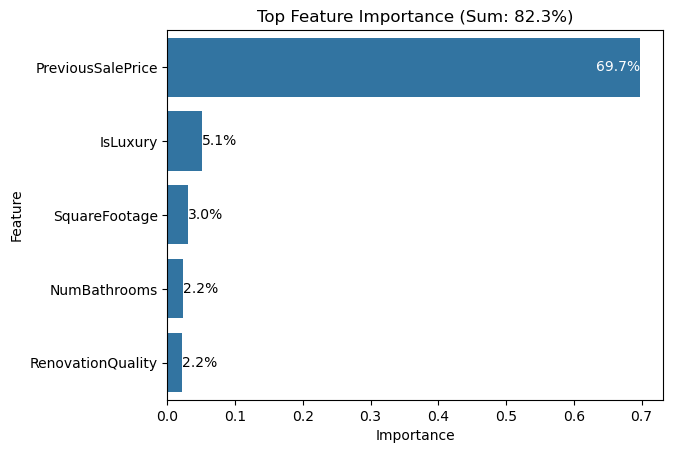

In [12]:
#create a dataframe with the top 5 most important features
names = list(X_test.columns)
values = model.feature_importances_
features_df = pd.DataFrame({'Feature': names, 'Importance': values})
features_df = features_df.sort_values(by='Importance', ascending=False)
top_df = features_df.head(5).reset_index(drop=True)
#visualize them
sns.barplot(y='Feature', x='Importance', data=top_df)
v = top_df.loc[0, 'Importance']
plt.annotate(f"{v:.1%}", (v,0), ha='right', va='center', color='white')
for i in range(1, len(top_df)):
	v = top_df.loc[i, 'Importance']
	plt.annotate(f"{v:.1%}", (v,i), ha='left', va='center')
plt.title(f'Top Feature Importance (Sum: {top_df.Importance.sum():.1%})')
plt.show()